# Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandasql import sqldf
import lightgbm as lgb
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.neighbors import KNeighborsClassifier 
import more_itertools
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import kendalltau

# Reading Dataframe

In [2]:
Train = pd.read_csv('Desktop/Home_Credit/application_train.csv')
Test = pd.read_csv('Desktop/Home_Credit/Application_test.csv')

In [3]:
Train.shape

(307511, 122)

In [4]:
Test.shape

(48744, 121)

# Data Pre Processing

In [5]:
All = pd.merge(Train,Test,how='outer')

In [6]:
All.shape

(356255, 122)

# Dealing with Numerical Columns

In [7]:
for x in All['CNT_CHILDREN']:
    if x >6:
        All['CNT_CHILDREN'].replace({x: np.nan}, inplace = True)

In [8]:
All['DAYS_BIRTH'] = All['DAYS_BIRTH']/-365
All["DAYS_EMPLOYED"] = All["DAYS_EMPLOYED"].replace(365243, np.nan)
All['DAYS_EMPLOYED'] = All['DAYS_EMPLOYED']/-365
All['DAYS_ID_PUBLISH'] = All['DAYS_ID_PUBLISH']/-365
All['REGION_RATING_CLIENT_W_CITY'] = All['REGION_RATING_CLIENT_W_CITY'].replace(-1, 1)

In [9]:
All['DAYS_REGISTRATION'] = All['DAYS_REGISTRATION']/-365
All['DAYS_LAST_PHONE_CHANGE'] = All['DAYS_LAST_PHONE_CHANGE']/-365

In [10]:
for x in All['OWN_CAR_AGE']:
    if x >60:
        All['OWN_CAR_AGE'].replace({x: np.nan}, inplace = True)

In [11]:
for x in All['CNT_FAM_MEMBERS']:
    if x >5:
        All['CNT_FAM_MEMBERS'].replace({x: np.nan}, inplace = True)

In [12]:
for x in All['OBS_30_CNT_SOCIAL_CIRCLE']:
    if x >17:
        All['OBS_30_CNT_SOCIAL_CIRCLE'].replace({x: np.nan}, inplace = True)

In [13]:
for x in All['DEF_30_CNT_SOCIAL_CIRCLE']:
    if x >5:
        All['DEF_30_CNT_SOCIAL_CIRCLE'].replace({x: np.nan}, inplace = True)

In [14]:
for x in All['OBS_60_CNT_SOCIAL_CIRCLE']:
    if x >16:
        All['OBS_60_CNT_SOCIAL_CIRCLE'].replace({x: np.nan}, inplace = True)

In [15]:
for x in All['DEF_60_CNT_SOCIAL_CIRCLE']:
    if x >4:
        All['DEF_60_CNT_SOCIAL_CIRCLE'].replace({x: np.nan}, inplace = True)

In [16]:
for x in All['AMT_REQ_CREDIT_BUREAU_HOUR']:
    if x >1:
        All['AMT_REQ_CREDIT_BUREAU_HOUR'].replace({x: np.nan}, inplace = True)

In [17]:
for x in All['AMT_REQ_CREDIT_BUREAU_DAY']:
    if x >2:
        All['AMT_REQ_CREDIT_BUREAU_DAY'].replace({x: np.nan}, inplace = True)

In [18]:
for x in All['AMT_REQ_CREDIT_BUREAU_WEEK']:
    if x >2:
        All['AMT_REQ_CREDIT_BUREAU_WEEK'].replace({x: np.nan}, inplace = True)

In [19]:
for x in All['AMT_REQ_CREDIT_BUREAU_MON']:
    if x >5:
        All['AMT_REQ_CREDIT_BUREAU_MON'].replace({x: np.nan}, inplace = True)

In [20]:
for x in All['AMT_REQ_CREDIT_BUREAU_QRT']:
    if x >5:
        All['AMT_REQ_CREDIT_BUREAU_QRT'].replace({x: np.nan}, inplace = True)

In [21]:
for x in All['AMT_REQ_CREDIT_BUREAU_YEAR']:
    if x >10:
        All['AMT_REQ_CREDIT_BUREAU_YEAR'].replace({x: np.nan}, inplace = True)

# Dealing with Categorical Columns

In [22]:
All.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [23]:
All['CODE_GENDER'] = All['CODE_GENDER'].replace('XNA', np.nan)
All['NAME_FAMILY_STATUS'] = All['NAME_FAMILY_STATUS'].replace('Unknown', np.nan)

In [24]:
All.CODE_GENDER = All.CODE_GENDER.replace('F',0)
All.CODE_GENDER = All.CODE_GENDER.replace('M',1)
le = LabelEncoder()
le.fit(All.NAME_CONTRACT_TYPE)
All.NAME_CONTRACT_TYPE = le.transform(All.NAME_CONTRACT_TYPE)
le.fit(All.FLAG_OWN_CAR)
All.FLAG_OWN_CAR = le.transform(All.FLAG_OWN_CAR)
le.fit(All.FLAG_OWN_REALTY)
All.FLAG_OWN_REALTY = le.transform(All.FLAG_OWN_REALTY)
All.EMERGENCYSTATE_MODE = le.fit_transform(All.EMERGENCYSTATE_MODE.astype(str))

In [25]:
All = pd.get_dummies(All)

# Dealing with Missing Values

In [26]:
All.isnull().sum() * 100 / len(All)

SK_ID_CURR                                            0.000000
TARGET                                               13.682334
NAME_CONTRACT_TYPE                                    0.000000
CODE_GENDER                                           0.001123
FLAG_OWN_CAR                                          0.000000
FLAG_OWN_REALTY                                       0.000000
CNT_CHILDREN                                          0.007860
AMT_INCOME_TOTAL                                      0.000000
AMT_CREDIT                                            0.000000
AMT_ANNUITY                                           0.010105
AMT_GOODS_PRICE                                       0.078034
REGION_POPULATION_RELATIVE                            0.000000
DAYS_BIRTH                                            0.000000
DAYS_EMPLOYED                                        18.146552
DAYS_REGISTRATION                                     0.000000
DAYS_ID_PUBLISH                                       0

In [27]:
All['AMT_ANNUITY'] = All['AMT_ANNUITY'].fillna(All['AMT_ANNUITY'].mean())
All['CODE_GENDER'].fillna(All['CODE_GENDER'].mode()[0], inplace=True)
All['EXT_SOURCE_1'] = All['EXT_SOURCE_1'].fillna(All['EXT_SOURCE_1'].mean())
All['EXT_SOURCE_2'] = All['EXT_SOURCE_2'].fillna(All['EXT_SOURCE_2'].mean())
All['EXT_SOURCE_3'] = All['EXT_SOURCE_3'].fillna(All['EXT_SOURCE_3'].mean())
All['DAYS_EMPLOYED'] = All['DAYS_EMPLOYED'].fillna(All['DAYS_EMPLOYED'].mean())
All['AMT_REQ_CREDIT_BUREAU_MON'].fillna(All['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace=True)
All['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(All['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace=True)
All['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(All['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace=True)
All['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(All['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace=True)
All['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(All['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace=True)
All['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(All['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)
All['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(All['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
All['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(All['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
All['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(All['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
All['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(All['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
All['EXT_SOURCE_2'] = All['EXT_SOURCE_2'].fillna(All['EXT_SOURCE_2'].mean())
All['CNT_FAM_MEMBERS'].fillna(All['CNT_FAM_MEMBERS'].mode()[0], inplace=True)
All['AMT_GOODS_PRICE'] = All['AMT_GOODS_PRICE'].fillna(All['AMT_GOODS_PRICE'].mean())
All['CNT_CHILDREN'].fillna(All['CNT_CHILDREN'].mode()[0], inplace=True)
All['REGION_RATING_CLIENT_W_CITY'].fillna(All['REGION_RATING_CLIENT_W_CITY'].mode()[0], inplace=True)
All['DAYS_LAST_PHONE_CHANGE'].fillna(All['DAYS_LAST_PHONE_CHANGE'].mode()[0], inplace=True)

In [28]:
dataset_missing = (All.isnull().sum() / len(All)).sort_values(ascending = False)
dataset_missing = dataset_missing.index[dataset_missing > 0.45]
All = All.drop(columns = dataset_missing)

In [29]:
All.CODE_GENDER = All.CODE_GENDER.astype('int64')
All.CODE_GENDER = All.CODE_GENDER.astype(object)
All.CNT_CHILDREN = All.CNT_CHILDREN.astype('int64')
All.CNT_CHILDREN = All.CNT_CHILDREN.astype(object)
All.AMT_INCOME_TOTAL = All.AMT_INCOME_TOTAL.astype('int64')
All.AMT_CREDIT = All.AMT_CREDIT.astype('int64')
All.AMT_ANNUITY = All.AMT_ANNUITY.astype('int64')
All.AMT_GOODS_PRICE = All.AMT_GOODS_PRICE.astype('int64')
All.DAYS_BIRTH = All.DAYS_BIRTH.astype('int64')
All.DAYS_EMPLOYED = All.DAYS_EMPLOYED.astype('int64')
All.DAYS_REGISTRATION = All.DAYS_REGISTRATION.astype('int64')
All.DAYS_ID_PUBLISH = All.DAYS_ID_PUBLISH.astype('int64')
All.CNT_FAM_MEMBERS = All.CNT_FAM_MEMBERS.astype('int64')
All.CNT_FAM_MEMBERS = All.CNT_FAM_MEMBERS.astype(object)
All.REGION_RATING_CLIENT_W_CITY = All.REGION_RATING_CLIENT_W_CITY.astype('int64')
All.REGION_RATING_CLIENT_W_CITY = All.REGION_RATING_CLIENT_W_CITY.astype(object)
All.OBS_30_CNT_SOCIAL_CIRCLE = All.OBS_30_CNT_SOCIAL_CIRCLE.astype('int64')
All.DEF_30_CNT_SOCIAL_CIRCLE = All.DEF_30_CNT_SOCIAL_CIRCLE.astype('int64')
All.OBS_60_CNT_SOCIAL_CIRCLE = All.OBS_60_CNT_SOCIAL_CIRCLE.astype('int64')
All.DEF_60_CNT_SOCIAL_CIRCLE = All.DEF_60_CNT_SOCIAL_CIRCLE.astype('int64')
All.OBS_30_CNT_SOCIAL_CIRCLE = All.OBS_30_CNT_SOCIAL_CIRCLE.astype(object)
All.DEF_30_CNT_SOCIAL_CIRCLE = All.DEF_30_CNT_SOCIAL_CIRCLE.astype(object)
All.OBS_60_CNT_SOCIAL_CIRCLE = All.OBS_60_CNT_SOCIAL_CIRCLE.astype(object)
All.DEF_60_CNT_SOCIAL_CIRCLE = All.DEF_60_CNT_SOCIAL_CIRCLE.astype(object)
All.DAYS_LAST_PHONE_CHANGE = All.DAYS_LAST_PHONE_CHANGE.astype('int64')
All.AMT_REQ_CREDIT_BUREAU_HOUR = All.AMT_REQ_CREDIT_BUREAU_HOUR.astype('int64')
All.AMT_REQ_CREDIT_BUREAU_DAY = All.AMT_REQ_CREDIT_BUREAU_DAY.astype('int64')
All.AMT_REQ_CREDIT_BUREAU_WEEK = All.AMT_REQ_CREDIT_BUREAU_WEEK.astype('int64')
All.AMT_REQ_CREDIT_BUREAU_MON = All.AMT_REQ_CREDIT_BUREAU_MON.astype('int64')
All.AMT_REQ_CREDIT_BUREAU_QRT = All.AMT_REQ_CREDIT_BUREAU_QRT.astype('int64')
All.AMT_REQ_CREDIT_BUREAU_YEAR = All.AMT_REQ_CREDIT_BUREAU_YEAR.astype('int64')
All.AMT_REQ_CREDIT_BUREAU_HOUR = All.AMT_REQ_CREDIT_BUREAU_HOUR.astype(object)
All.AMT_REQ_CREDIT_BUREAU_DAY = All.AMT_REQ_CREDIT_BUREAU_DAY.astype(object)
All.AMT_REQ_CREDIT_BUREAU_WEEK = All.AMT_REQ_CREDIT_BUREAU_WEEK.astype(object)
All.AMT_REQ_CREDIT_BUREAU_MON = All.AMT_REQ_CREDIT_BUREAU_MON.astype(object)
All.AMT_REQ_CREDIT_BUREAU_QRT = All.AMT_REQ_CREDIT_BUREAU_QRT.astype(object)
All.AMT_REQ_CREDIT_BUREAU_YEAR = All.AMT_REQ_CREDIT_BUREAU_YEAR.astype(object)

# Feature Selection

In [30]:
# create new variables
All['EMPLOY_AGE'] = All['DAYS_EMPLOYED'] / All['DAYS_BIRTH']
All['INCOME_AGE'] = All['AMT_INCOME_TOTAL'] / All['DAYS_BIRTH']
All['CREDIT_AGE'] = All['AMT_CREDIT'] / All['DAYS_BIRTH']
All['CREDIT_INCOME'] = All['AMT_CREDIT'] / All['AMT_INCOME_TOTAL']
All['ANNUITY_INCOME'] = All['AMT_ANNUITY'] / All['AMT_INCOME_TOTAL']
All['ANNUITY_CREDIT'] = All['AMT_ANNUITY'] / All['AMT_CREDIT']

In [31]:
#Checking Correlation of Features with the Target variable
correlations = All.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 EMERGENCYSTATE_MODE                                  0.041955
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                           -0.160303
EXT_SOURCE_3                           -0.157473
EXT_SOURCE_1                           -0.099163
DAYS_BIRTH                             -0.078234
DAYS_EMPLOYED                          -0.069774
EMPLOY_AGE                             -0.05692

In [32]:
All.TARGET = All.TARGET.replace(np.nan,"ABC")

In [33]:
Test = All[All['TARGET'] == "ABC"]
Train = All[All['TARGET'] != "ABC"]

In [34]:
Test = Test.drop(['TARGET'], axis=1)

In [35]:
Train.TARGET = Train.TARGET.astype('int64')
Train.TARGET = Train.TARGET.astype('category')

In [36]:
X_test = Test
X_test.drop(columns=['SK_ID_CURR'], axis = 1, inplace=True)

In [37]:
y_train = Train['TARGET']
X_train = Train.drop(columns=['TARGET','SK_ID_CURR'], axis = 1)

In [38]:
numeric_data = pd.DataFrame(X_train.select_dtypes(include=[np.number]))
arr = []
cols = list(numeric_data.columns)
len(cols)
ycat = Train['TARGET']

for item in cols:
    x1 = numeric_data[item]
    coef, p = kendalltau(x1, ycat)
    print('Kendall correlation coefficient: %.3f' % coef)
    # interpret the significance
    alpha = 0.05
    p = abs(p)
    if p > alpha:
        continue
    else:
        arr.append(numeric_data[[item]].columns.values.tolist())

arr = list(arr)
arr = list(more_itertools.collapse(arr))
arr

Kendall correlation coefficient: -0.031
Kendall correlation coefficient: -0.022
Kendall correlation coefficient: -0.006
Kendall correlation coefficient: -0.015
Kendall correlation coefficient: -0.014
Kendall correlation coefficient: -0.000
Kendall correlation coefficient: -0.026
Kendall correlation coefficient: -0.025
Kendall correlation coefficient: -0.065
Kendall correlation coefficient: -0.070
Kendall correlation coefficient: -0.033
Kendall correlation coefficient: -0.044
Kendall correlation coefficient: 0.001
Kendall correlation coefficient: 0.046
Kendall correlation coefficient: 0.029
Kendall correlation coefficient: 0.000
Kendall correlation coefficient: -0.024
Kendall correlation coefficient: -0.002
Kendall correlation coefficient: 0.057
Kendall correlation coefficient: -0.019
Kendall correlation coefficient: 0.006
Kendall correlation coefficient: 0.007
Kendall correlation coefficient: 0.003
Kendall correlation coefficient: 0.044
Kendall correlation coefficient: 0.051
Kendall co

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EMERGENCYSTATE_MODE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_21',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INC

In [39]:
categorical_data = pd.DataFrame(X_train.select_dtypes(exclude=[np.number]))
ycat = Train['TARGET']
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(categorical_data,ycat)
var1 = fs.transform(categorical_data)
ar =[]
for i in range(len(fs.scores_)):
    if(fs.scores_[i] > 100):
        print('Feature %d: %f' % (i, fs.scores_[i]))
        ar.append(i)

ar
arr2 = categorical_data.columns.values[0],categorical_data.columns.values[2],categorical_data.columns.values[3],categorical_data.columns.values[4]
arr2 = list(arr2)
arr2

Feature 0: 606.035521
Feature 1: 139.019171
Feature 3: 141.856657
Feature 4: 117.791004
Feature 5: 452.742084
Feature 6: 114.600763
Feature 7: 397.323325


['CODE_GENDER',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE']

In [40]:
Final_list = arr + arr2
Train1 = Train.filter(Final_list)
Test1 = Test.filter(Final_list)

In [41]:
Train1 = pd.concat([Train1,y_train], axis=1, join='inner')

# Modeling

In [42]:
Train_majority = Train1[Train1.TARGET==0]
Train_minority = Train1[Train1.TARGET==1]
Train_minority_upsampled = resample(Train_minority,replace=True,n_samples=282686,random_state=123)
Train_upsampled = pd.concat([Train_majority, Train_minority_upsampled])

In [43]:
X = Train_upsampled[Train_upsampled.columns[0:123]]
y = Train_upsampled['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
pca = PCA(.95)

In [46]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Model 1 - Naivye Bayes Model

In [48]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_pred1 = nb.predict(X_test)
accuracy_score(y_test, y_pred1, normalize=True, sample_weight=None)

0.6304045987176653

In [50]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63     56574
           1       0.63      0.62      0.63     56501

    accuracy                           0.63    113075
   macro avg       0.63      0.63      0.63    113075
weighted avg       0.63      0.63      0.63    113075



Text(0.5, 1.0, 'Test Set Results')

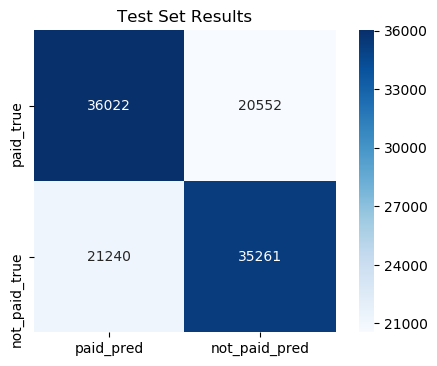

In [51]:
plt.figure(dpi=100)
#plt.subplot(1,2,1)
    
lr_confusion = confusion_matrix(y_test, y_pred1)
    
sns.heatmap(lr_confusion, cmap=plt.cm.Blues,annot=True, square=True,fmt='g',
            xticklabels=['paid_pred','not_paid_pred'], 
            yticklabels=['paid_true','not_paid_true'])


plt.title('Test Set Results')

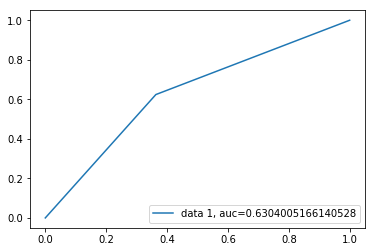

In [52]:
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred1)
auc = metrics.roc_auc_score(y_test, y_pred1)
plt.plot(fpr1,tpr1,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Model 2 - Logistic Regression

In [53]:
lr = LogisticRegression(C=10, class_weight='balanced',penalty='l1')
lr.fit(X_train,y_train)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = lr.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.6760645589210701

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68     56574
           1       0.68      0.67      0.67     56501

    accuracy                           0.68    113075
   macro avg       0.68      0.68      0.68    113075
weighted avg       0.68      0.68      0.68    113075



Text(0.5, 1.0, 'Test Set Results')

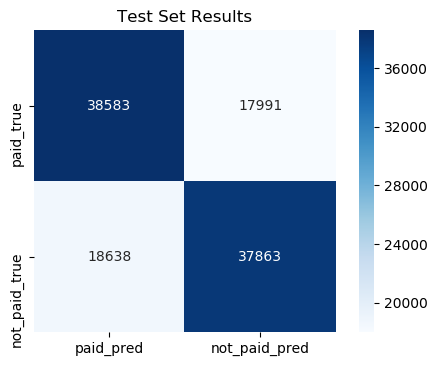

In [57]:
plt.figure(dpi=100)
#plt.subplot(1,2,1)
    
lr_confusion = confusion_matrix(y_test, y_pred)
    
sns.heatmap(lr_confusion, cmap=plt.cm.Blues,annot=True, square=True,fmt='g',
            xticklabels=['paid_pred','not_paid_pred'], 
            yticklabels=['paid_true','not_paid_true'])

plt.title('Test Set Results')

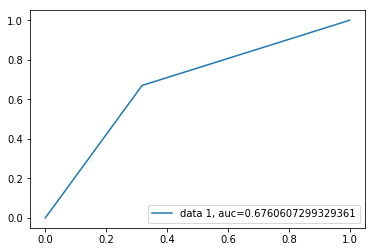

In [58]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Model 3 - H20 Generalized Linear Estimator

In [59]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from C:\Users\shrey\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\shrey\AppData\Local\Temp\tmp65gukjin
  JVM stdout: C:\Users\shrey\AppData\Local\Temp\tmp65gukjin\h2o_shrey_started_from_python.out
  JVM stderr: C:\Users\shrey\AppData\Local\Temp\tmp65gukjin\h2o_shrey_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,10 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,"1 year, 3 months and 22 days !!!"
H2O cluster name:,H2O_from_python_shrey_iga3e0
H2O cluster total nodes:,1
H2O cluster free memory:,3.539 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [60]:
Data1 = h2o.H2OFrame(Train1)
Data2 = h2o.H2OFrame(Test1)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [61]:
Data1.describe()

Rows:307511
Cols:124




,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMPLOY_AGE,INCOME_AGE,CREDIT_AGE,ANNUITY_INCOME,ANNUITY_CREDIT,CODE_GENDER,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,TARGET
type,int,int,int,int,int,int,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real,real,real,int,int,int,int,int
mins,0.0,0.0,0.0,25650.0,45000.0,40500.0,0.00029,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014568132412445587,8.173616518884396e-08,0.0005272652387098817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [62]:
Data_split = Data1.split_frame(ratios = [0.8], seed = 1234)
Data_train = Data_split[0] # using 80% for training
Data_test = Data_split[1] #rest 20% for testing

In [63]:
predictors = list(Data1.columns) 
predictors.remove('TARGET')

In [64]:
glm = H2OGeneralizedLinearEstimator(family = 'binomial', model_id = 'glm_default')
glm.train(x = predictors, 
          y = 'TARGET', 
          training_frame = Data_train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [65]:
glm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_default


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.06858940088914667
RMSE: 0.26189578249591317
LogLoss: 0.24933094117266502
Null degrees of freedom: 246176
Residual degrees of freedom: 246063
Null deviance: 138207.7233402899
Residual deviance: 122759.08621012633
AIC: 122987.08621012633
AUC: 0.7482968335594452
pr_auc: 0.22690875349610168
Gini: 0.4965936671188904
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1444679154913154: 


,0,1,Error,Rate
0,198698.0,27589.0,0.1219,(27589.0/226287.0)
1,11622.0,8268.0,0.5843,(11622.0/19890.0)
Total,210320.0,35857.0,0.1593,(39211.0/246177.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1444679,0.2966258,200.0
max f2,0.0834824,0.4124082,270.0
max f0point5,0.2139436,0.2799311,146.0
max accuracy,0.6164101,0.9192695,12.0
max precision,0.6164101,0.6176471,12.0
max recall,0.0045849,1.0,398.0
max specificity,0.9999472,0.9999956,0.0
max absolute_mcc,0.1435824,0.2270198,201.0
max min_per_class_accuracy,0.0803377,0.6826243,274.0
max mean_per_class_accuracy,0.0834824,0.6832343,270.0


Gains/Lift Table: Avg response rate:  8.08 %, avg score:  8.08 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100009,0.3762244,5.4394114,5.4394114,0.4394801,0.4489267,0.4394801,0.4489267,0.0543992,0.0543992,443.9411360,443.9411360
,2,0.0200019,0.3147056,4.0167187,4.7280651,0.3245329,0.3421092,0.3820065,0.3955180,0.0401709,0.0945701,301.6718740,372.8065050
,3,0.0300028,0.2797358,3.7000062,4.3853788,0.2989439,0.2958442,0.3543190,0.3622934,0.0370035,0.1315737,270.0006249,338.5378783
,4,0.0400037,0.2540659,3.2475598,4.1009240,0.2623883,0.2665744,0.3313363,0.3383636,0.0324786,0.1640523,224.7559833,310.0924045
,5,0.0500006,0.2342002,3.0225643,3.8853222,0.2442097,0.2438231,0.3139166,0.3194617,0.0302162,0.1942685,202.2564311,288.5322185
,6,0.1000012,0.1748776,2.5680934,3.2267078,0.2074905,0.2012061,0.2607036,0.2603339,0.1284062,0.3226747,156.8093390,222.6707787
,7,0.1500018,0.1416018,2.0140529,2.8224895,0.1627265,0.1571629,0.2280445,0.2259435,0.1007039,0.4233786,101.4052882,182.2489485
,8,0.2000024,0.1194324,1.6229063,2.5225937,0.1311236,0.1298500,0.2038143,0.2019202,0.0811463,0.5045249,62.2906316,152.2593693
,9,0.2999996,0.0901258,1.2840989,2.1097733,0.1037494,0.1035747,0.1704602,0.1691392,0.1284062,0.6329311,28.4098856,110.9773261
,10,0.4000008,0.0704954,0.9999878,1.8323241,0.0807945,0.0797275,0.1480436,0.1467861,0.1,0.7329311,-0.0012186,83.2324081



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2020-05-11 17:20:02,0.000 sec,0,69103.8616701,0.2807080
,2020-05-11 17:20:04,1.201 sec,1,62597.1428885,0.2546201
,2020-05-11 17:20:04,1.657 sec,2,61410.2587755,0.2497866
,2020-05-11 17:20:06,3.481 sec,3,61400.8078643,0.2497501
,2020-05-11 17:20:07,4.202 sec,4,61382.4965025,0.2496851
,2020-05-11 17:20:08,5.221 sec,5,61379.5431051,0.2496741


In [66]:
glm.model_performance(Data_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.06857551753065963
RMSE: 0.2618692756522988
LogLoss: 0.24888324938917716
Null degrees of freedom: 61333
Residual degrees of freedom: 61220
Null deviance: 34334.13607841234
Residual deviance: 30530.01043607158
AIC: 30758.01043607158
AUC: 0.7499241644058984
pr_auc: 0.21890728777808757
Gini: 0.49984832881179675
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13033579592557806: 


,0,1,Error,Rate
0,48178.0,8221.0,0.1458,(8221.0/56399.0)
1,2649.0,2286.0,0.5368,(2649.0/4935.0)
Total,50827.0,10507.0,0.1772,(10870.0/61334.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1303358,0.2960756,208.0
max f2,0.0833837,0.4129406,265.0
max f0point5,0.2029516,0.2750625,145.0
max accuracy,0.6455541,0.9195878,4.0
max precision,0.6455541,0.7142857,4.0
max recall,0.0066525,1.0,396.0
max specificity,0.9836915,0.9999823,0.0
max absolute_mcc,0.1288468,0.2293287,210.0
max min_per_class_accuracy,0.0796471,0.6813064,271.0
max mean_per_class_accuracy,0.0674680,0.6845432,288.0


Gains/Lift Table: Avg response rate:  8.05 %, avg score:  7.99 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100108,0.3674163,4.8377527,4.8377527,0.3892508,0.4423319,0.3892508,0.4423319,0.0484296,0.0484296,383.7752674,383.7752674
,2,0.0200052,0.3123262,4.2576794,4.5479524,0.3425775,0.3374337,0.3659332,0.3899255,0.0425532,0.0909828,325.7679359,354.7952395
,3,0.0299997,0.2763115,3.5075168,4.2013290,0.2822186,0.2932219,0.3380435,0.3577085,0.0350557,0.1260385,250.7516805,320.1329016
,4,0.0400104,0.2502803,3.2993878,3.9756599,0.2654723,0.2626066,0.3198859,0.3339136,0.0330294,0.1590679,229.9387807,297.5659944
,5,0.0500049,0.2300449,2.8790022,3.7564714,0.2316476,0.2396278,0.3022498,0.3150688,0.0287741,0.1878419,187.9002233,275.6471429
,6,0.1000098,0.1718655,2.6299352,3.1932033,0.2116074,0.1973582,0.2569286,0.2562135,0.1315096,0.3193516,162.9935229,219.3203329
,7,0.1499984,0.1398939,2.0430195,2.8098921,0.1643836,0.1545789,0.2260870,0.2223426,0.1021277,0.4214792,104.3019528,180.9892075
,8,0.2000033,0.1179641,1.6654906,2.5237684,0.1340072,0.1283657,0.2030651,0.1988465,0.0832827,0.5047619,66.5490569,152.3768376
,9,0.2999967,0.0893528,1.2645202,2.1040418,0.1017447,0.1025277,0.1692935,0.1667420,0.1264438,0.6312057,26.4520158,110.4041782
,10,0.4000065,0.0699413,1.0637257,1.8439416,0.0855885,0.0791586,0.1483655,0.1448444,0.1063830,0.7375887,6.3725728,84.3941567


In [67]:
predictions = glm.predict(Data_test)
predictions

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.938286,0.0617141
0,0.959751,0.0402494
0,0.957754,0.0422459
0,0.94881,0.0511901
0,0.977474,0.022526
0,0.950043,0.0499567
0,0.887903,0.112097
0,0.883503,0.116497
1,0.833227,0.166773
0,0.924311,0.0756892


In [68]:
sorted(glm.coef_norm().items(), key=lambda x:
x[1], reverse=True)

[('AMT_CREDIT', 0.8093024861922805),
 ('AMT_INCOME_TOTAL', 0.415512977662461),
 ('CODE_GENDER', 0.15139299208275217),
 ('ANNUITY_INCOME', 0.1413245421303834),
 ('FLAG_DOCUMENT_3', 0.10646390104890355),
 ('REGION_RATING_CLIENT_W_CITY', 0.09304868085977545),
 ('NAME_EDUCATION_TYPE_Secondary / secondary special', 0.0749199372191264),
 ('FLAG_WORK_PHONE', 0.06254991270246987),
 ('REG_CITY_NOT_LIVE_CITY', 0.05684825955296352),
 ('ORGANIZATION_TYPE_Self-employed', 0.05566175179129994),
 ('FLAG_DOCUMENT_6', 0.04865835956982361),
 ('NAME_INCOME_TYPE_Working', 0.04362905471563334),
 ('HOUSETYPE_MODE_block of flats', 0.03762053751751361),
 ('OCCUPATION_TYPE_Laborers', 0.035749886663815046),
 ('OCCUPATION_TYPE_Drivers', 0.035613508931775534),
 ('ORGANIZATION_TYPE_Business Entity Type 3', 0.03415287379140934),
 ('ORGANIZATION_TYPE_Construction', 0.033477463058629905),
 ('ORGANIZATION_TYPE_Transport: type 3', 0.03245290387947703),
 ('EMERGENCYSTATE_MODE', 0.031082020931497686),
 ('NAME_EDUCATION_TY